In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from utils.paths import DATA_RAW_DIR

## Load Data

In [2]:
churn_data_path = Path(DATA_RAW_DIR) / "churn.csv"
print(f"Loading churn data from {churn_data_path}", Path(churn_data_path).exists())

Loading churn data from /Users/jssdev/Dev/Learning/Platzi/platzi-logistic-regression/data/raw/churn.csv True


In [3]:
df_churn = pd.read_csv(churn_data_path, sep=',', encoding='utf-8')
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## data type handling

In [6]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

In [8]:
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df_churn = df_churn.dropna().reset_index(drop=True)

In [10]:
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
# Delete CustomerID column
df_churn = df_churn.drop(columns=['customerID'])

In [13]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
df_churn['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df_churn['Churn'] = (df_churn['Churn'].map({'No': 0, 'Yes': 1}).astype('Int64'))

In [17]:
df_churn['Churn'].unique()

<IntegerArray>
[0, 1]
Length: 2, dtype: Int64

In [18]:
df_churn['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [19]:
categorical_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService',
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

numerical_list = ['MonthlyCharges', 'TotalCharges']

df_churn[categorical_list] = df_churn[categorical_list].astype('category')
df_churn[numerical_list] = df_churn[numerical_list].astype('float64')

In [20]:
df_churn.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [21]:
df_churn.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## Copy Processed data and Get dummies

In [23]:
df_churn_processed = df_churn.copy()

In [24]:
df_churn_processed.shape

(7032, 20)

In [25]:
df_churn_processed_1 = pd.get_dummies(df_churn_processed, columns=[
      'gender','SeniorCitizen','Partner','Dependents','PhoneService',
      'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
      'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
      'Contract','PaperlessBilling','PaymentMethod'
    ], drop_first=False, dtype=int)
df_churn_processed.shape

(7032, 20)

In [26]:
df_churn_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


## ANother way to get_dummies

In [27]:
df_churn_processed_2 = pd.get_dummies(df_churn_processed, columns=[
      'gender','SeniorCitizen','Partner','Dependents','PhoneService',
      'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
      'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
      'Contract','PaperlessBilling','PaymentMethod'
    ], drop_first=True, dtype=int)
df_churn_processed_2.shape

(7032, 31)

In [28]:
df_churn_processed_2.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


## Correlation analysis

In [29]:
import matplotlib.pyplot as plt

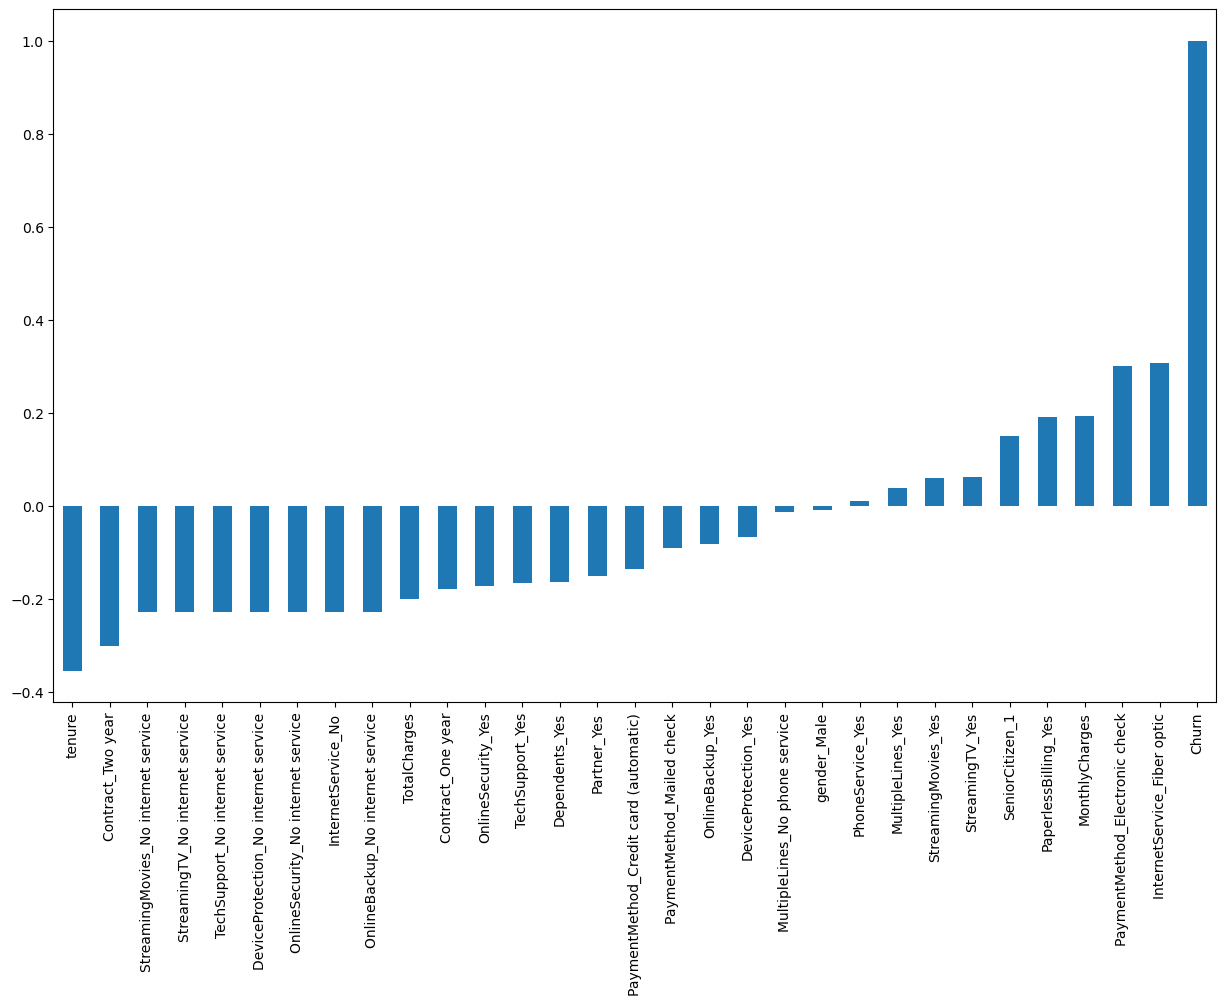

In [30]:
fig = plt.figure(figsize=(15,9))
df_churn_processed_2.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Standarization - Scaler

In [31]:
type(df_churn_processed_2)

pandas.core.frame.DataFrame

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()



In [34]:
df_churn_processed_scaled = scaler.fit_transform(df_churn_processed_2)

In [36]:
df_churn_processed_scaled

array([[0.        , 0.11542289, 0.0012751 , ..., 0.        , 1.        ,
        0.        ],
       [0.46478873, 0.38507463, 0.21586661, ..., 0.        , 0.        ,
        1.        ],
       [0.01408451, 0.35422886, 0.01031041, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.14084507, 0.11293532, 0.03780868, ..., 0.        , 1.        ,
        0.        ],
       [0.04225352, 0.55870647, 0.03321025, ..., 0.        , 0.        ,
        1.        ],
       [0.91549296, 0.86965174, 0.78764136, ..., 0.        , 0.        ,
        0.        ]], shape=(7032, 31))

In [37]:
type(df_churn_processed_scaled)

numpy.ndarray

In [38]:
df_churn_processed_scaled = pd.DataFrame(df_churn_processed_scaled)
print(df_churn_processed_scaled.head())
print(type(df_churn_processed_scaled))

         0         1         2    3    4    5    6    7    8    9   ...   21  \
0  0.000000  0.115423  0.001275  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0   
1  0.464789  0.385075  0.215867  0.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
2  0.014085  0.354229  0.010310  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   
3  0.619718  0.239303  0.210241  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0   
4  0.014085  0.521891  0.015330  1.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0   

    22   23   24   25   26   27   28   29   30  
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  

[5 rows x 31 columns]
<class 'pandas.core.frame.DataFrame'>


In [39]:
df_churn_processed_scaled.columns = df_churn_processed_2.columns

In [40]:
df_churn_processed_scaled.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000000,0.115423,0.001275,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.464789,0.385075,0.215867,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.014085,0.354229,0.010310,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.619718,0.239303,0.210241,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.014085,0.521891,0.015330,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


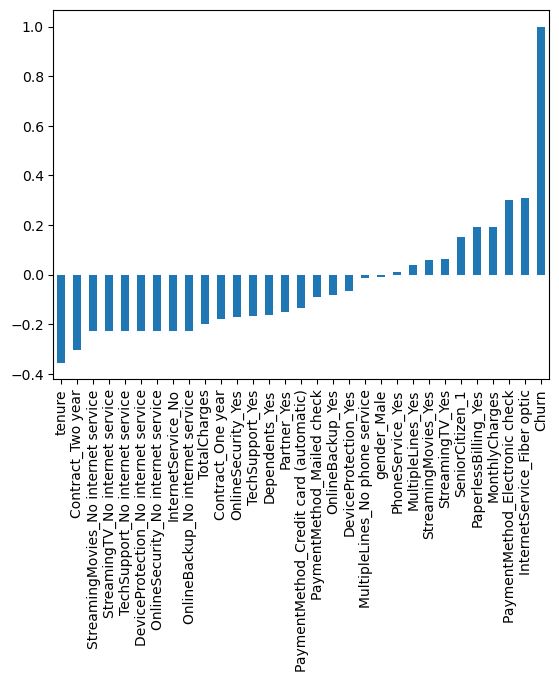

In [41]:
df_churn_processed_scaled.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## EDA

In [42]:
import seaborn as sns

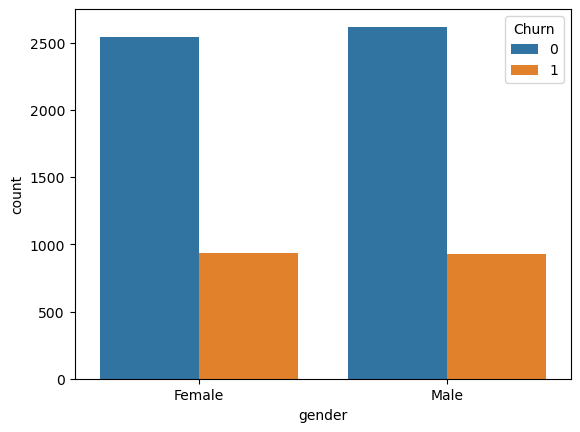

In [43]:
sns.countplot(data=df_churn, x='gender',hue='Churn')
plt.show()

In [44]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_churn, x=column,hue='Churn')
    plt.show()

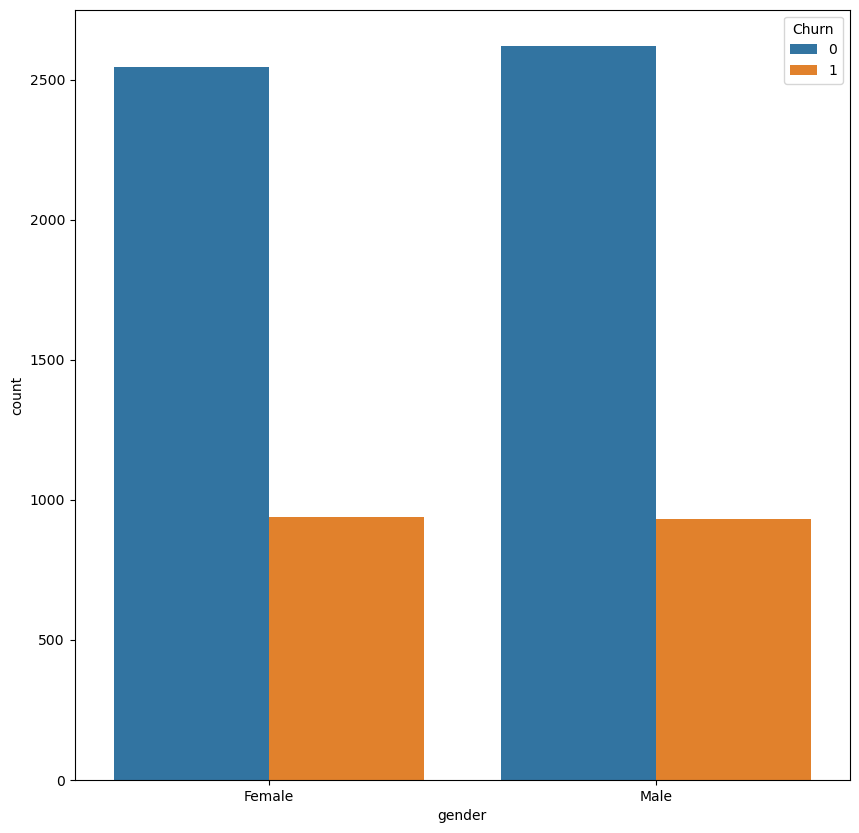

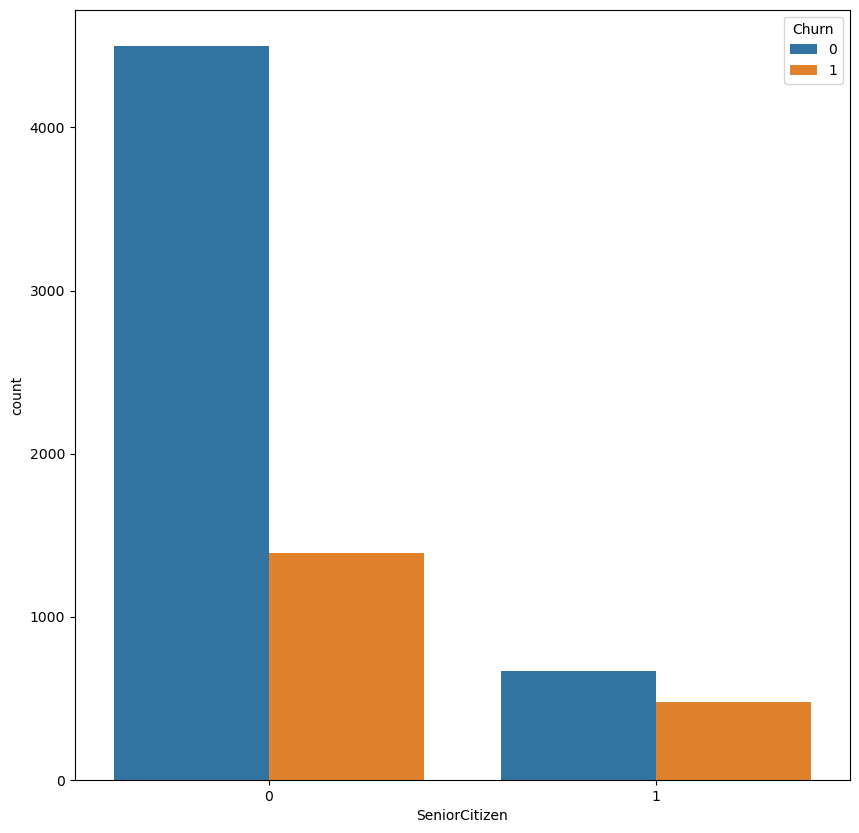

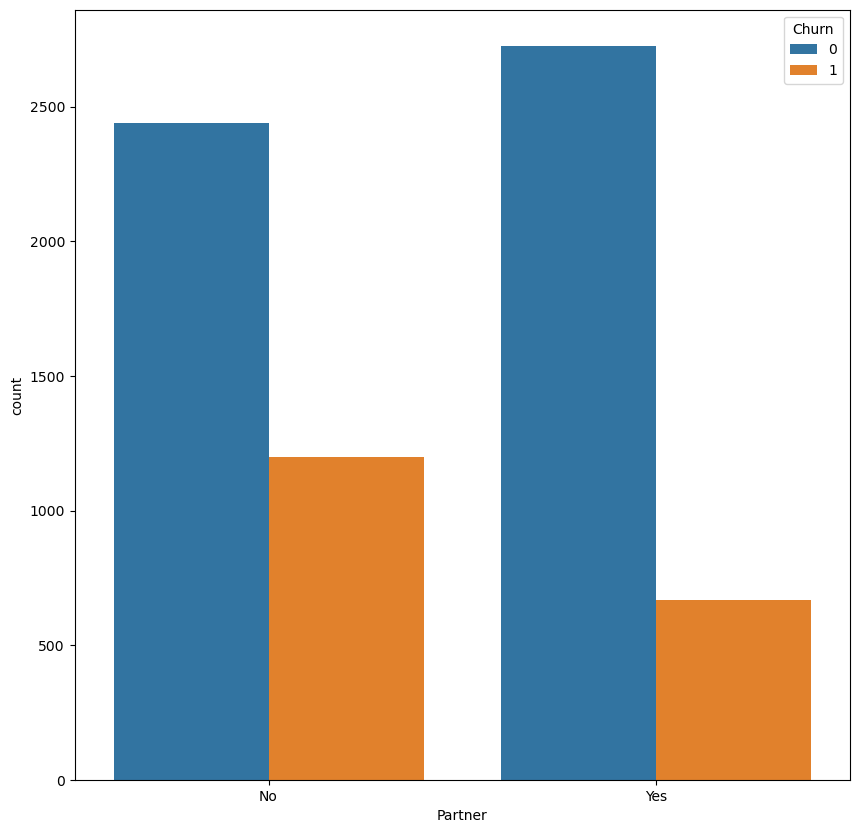

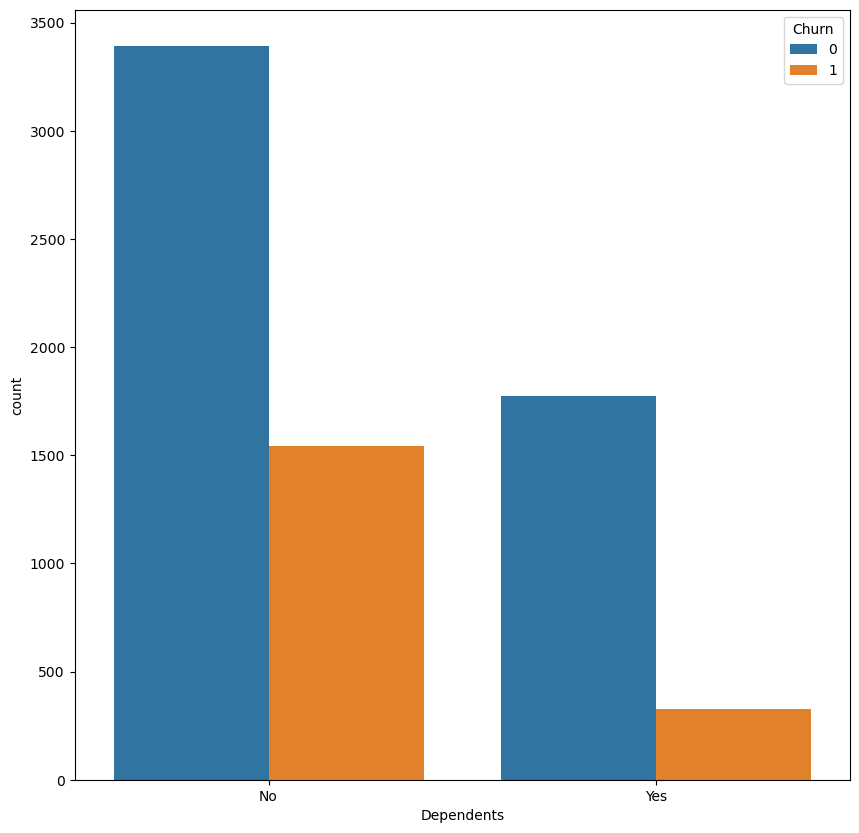

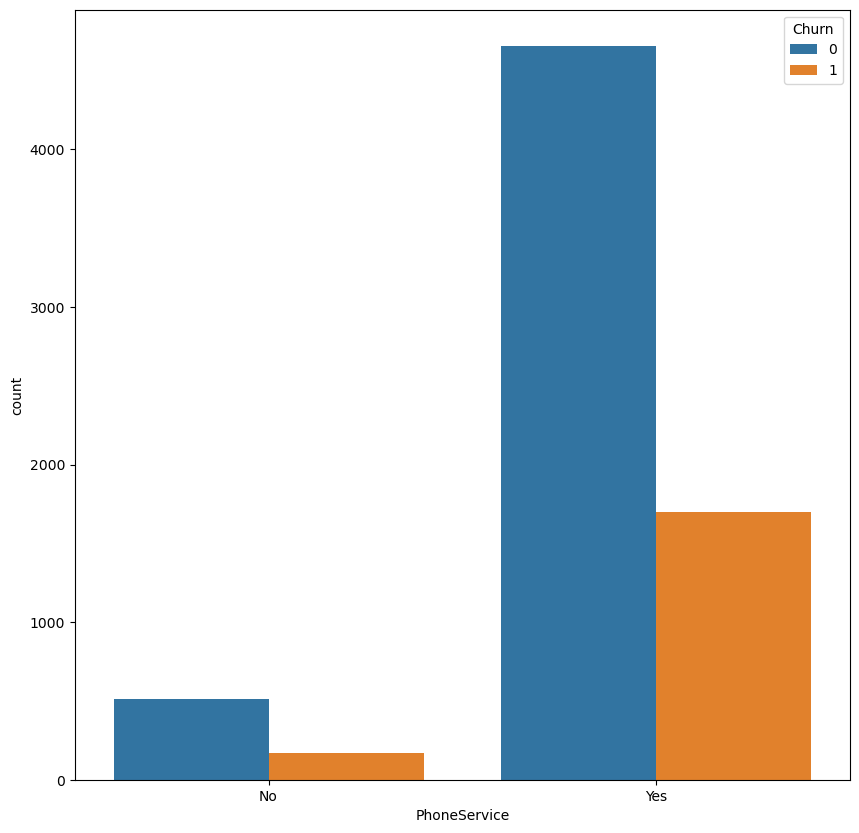

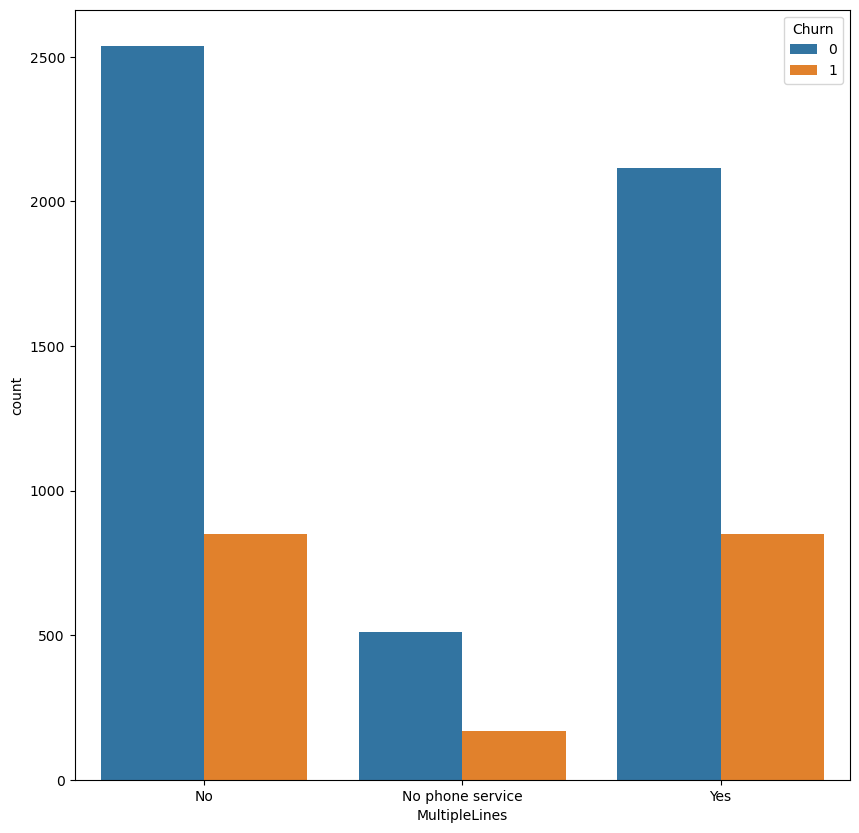

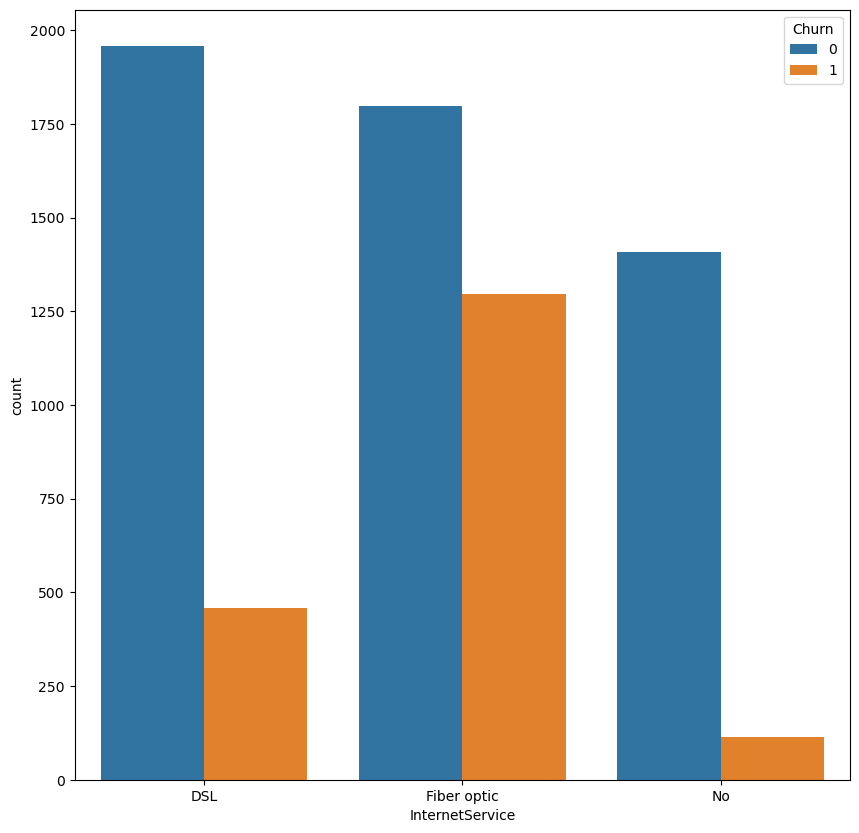

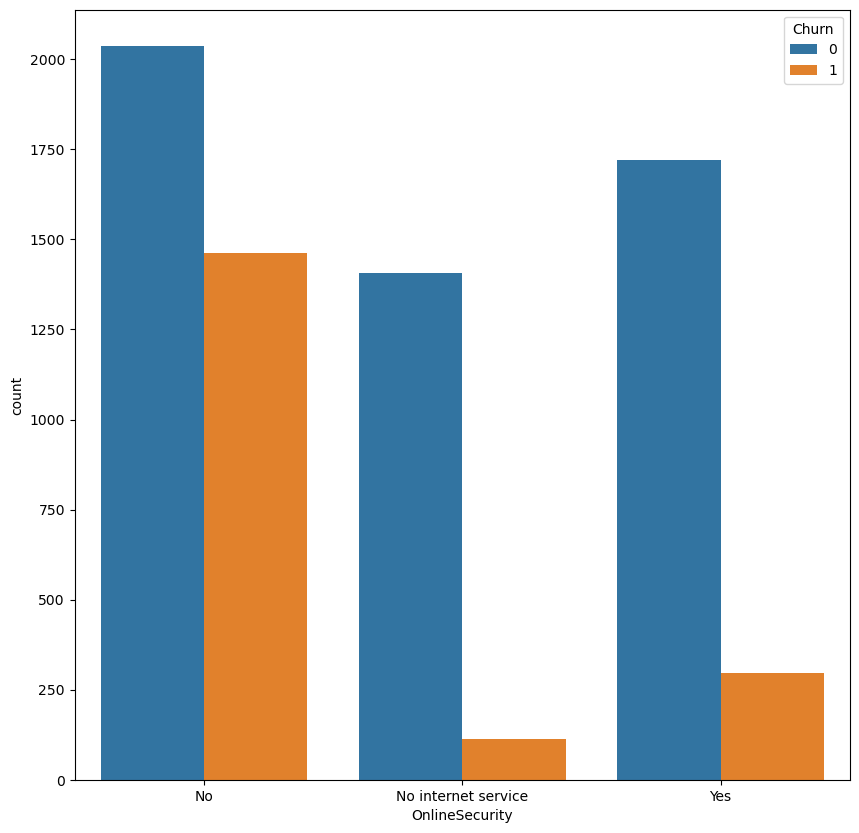

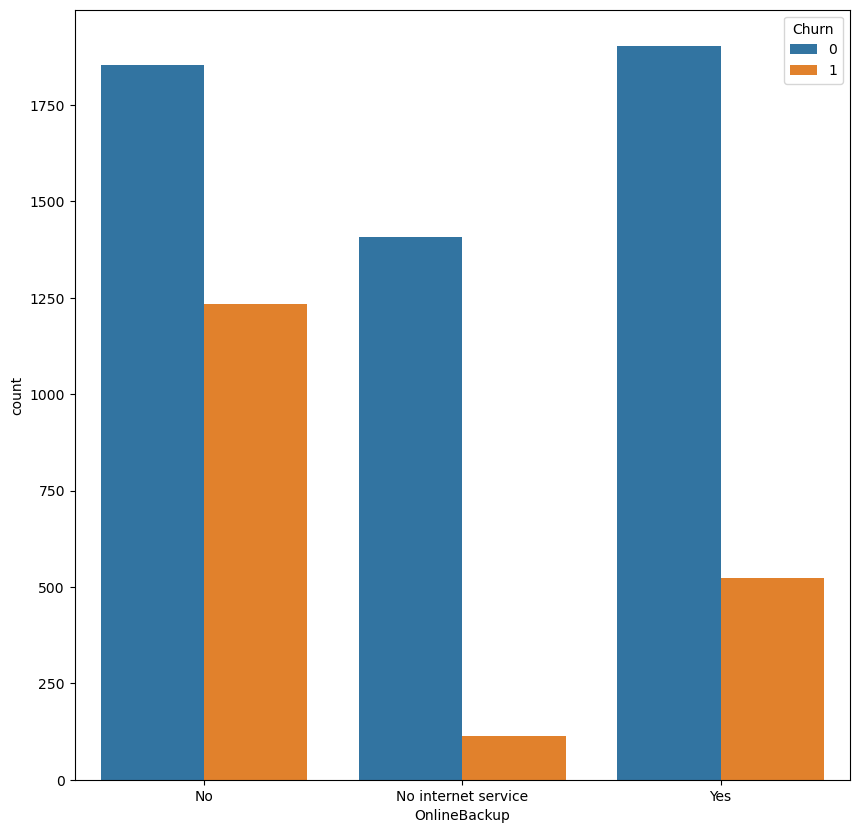

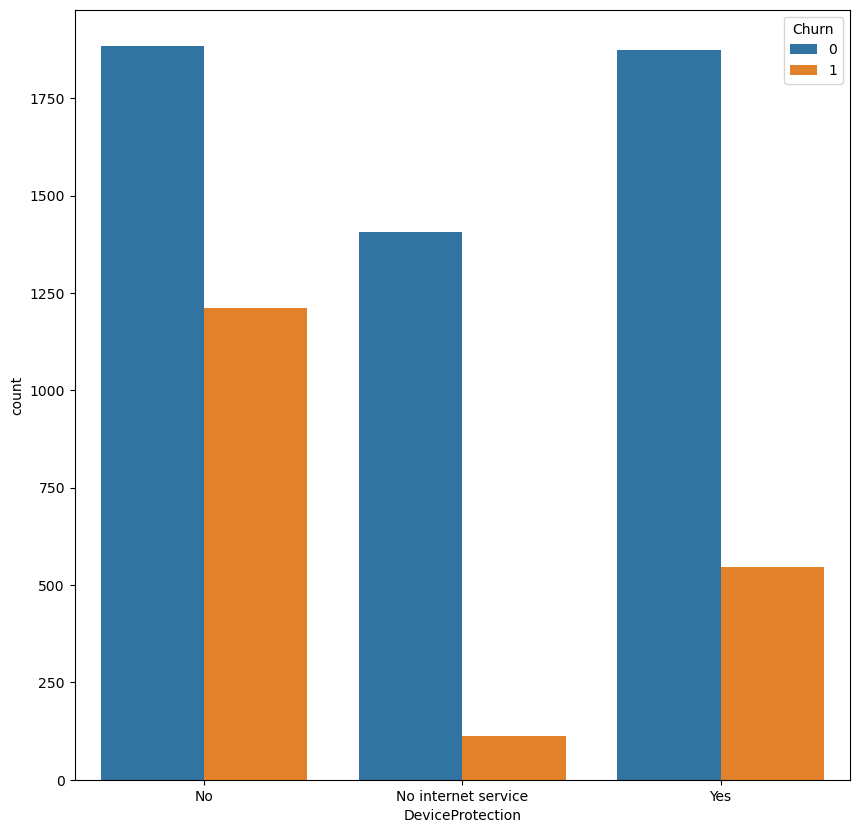

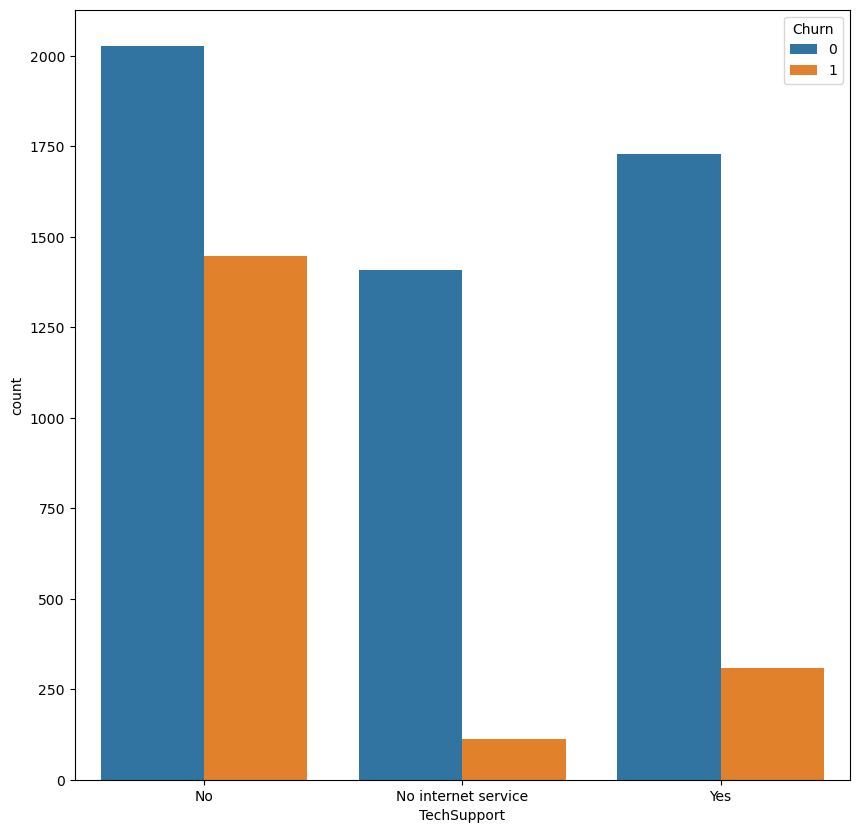

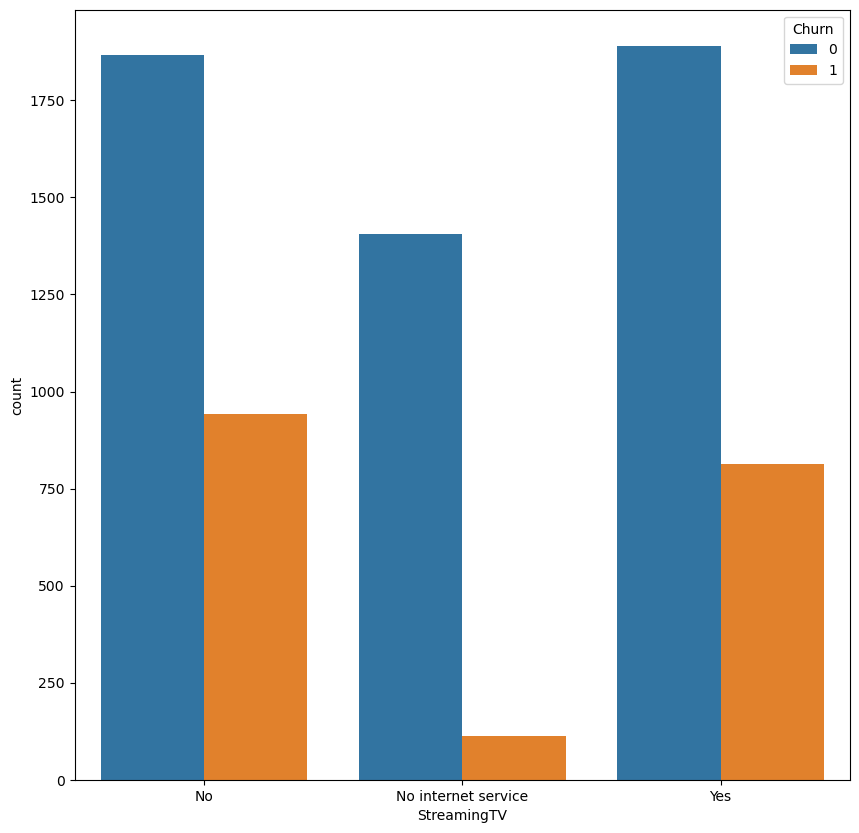

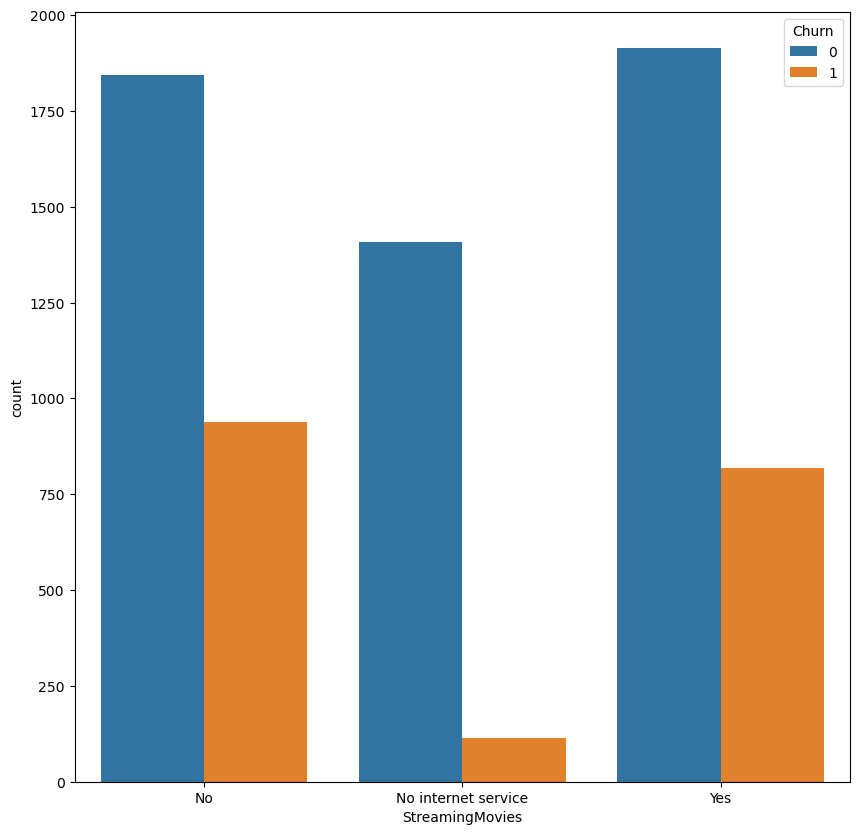

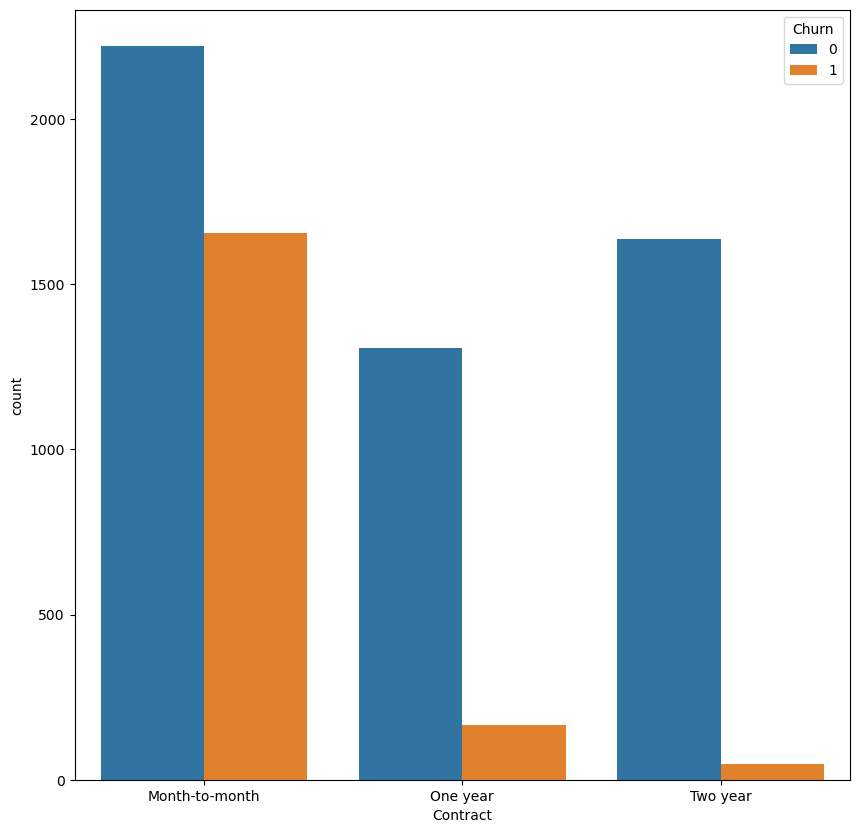

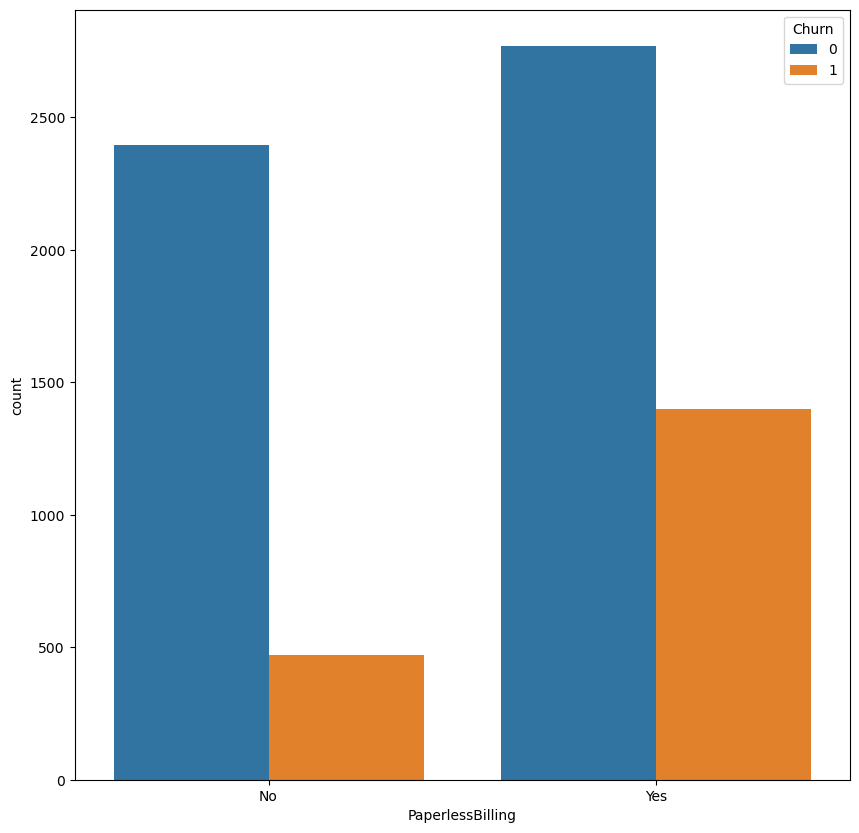

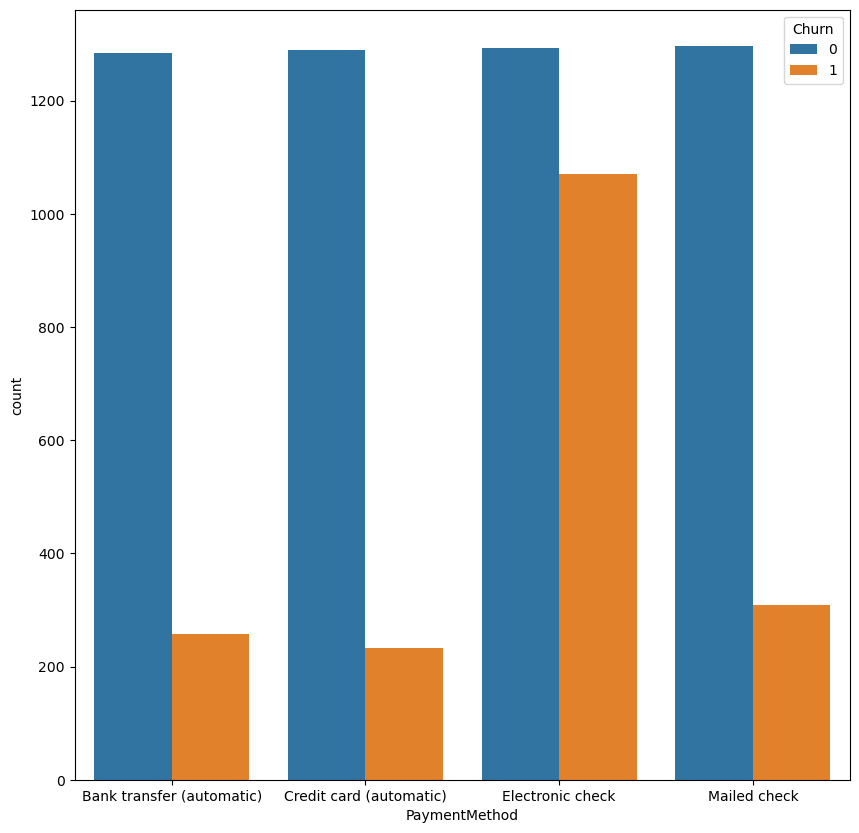

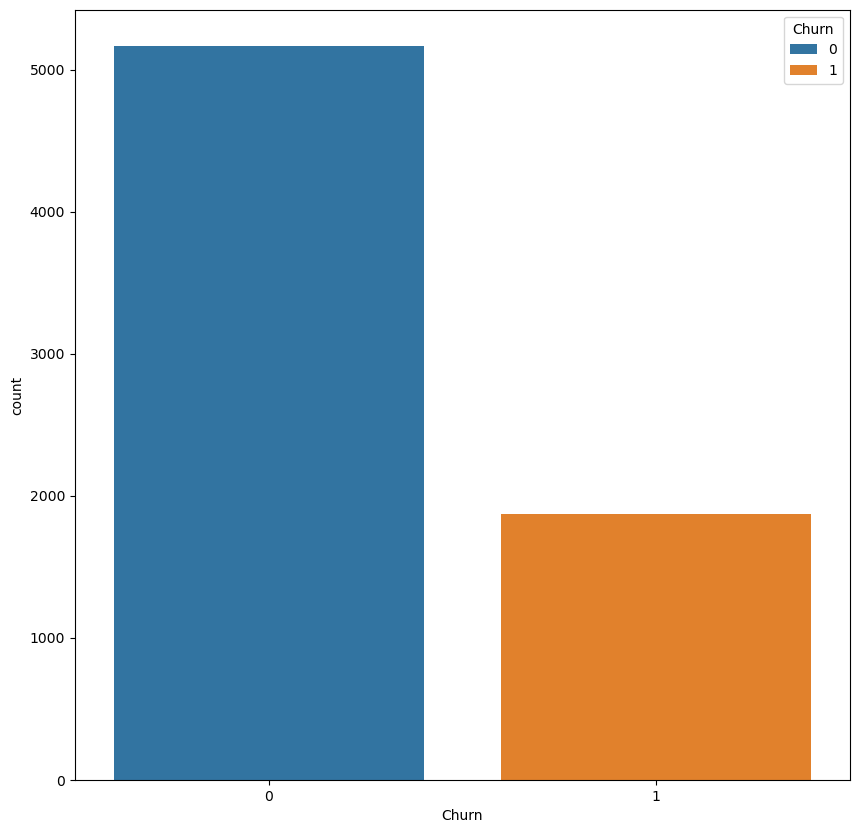

In [50]:
column_cat = df_churn.select_dtypes(include='category').columns

for _ in column_cat:
    plot_categorial(_)

<Figure size 1000x1000 with 0 Axes>

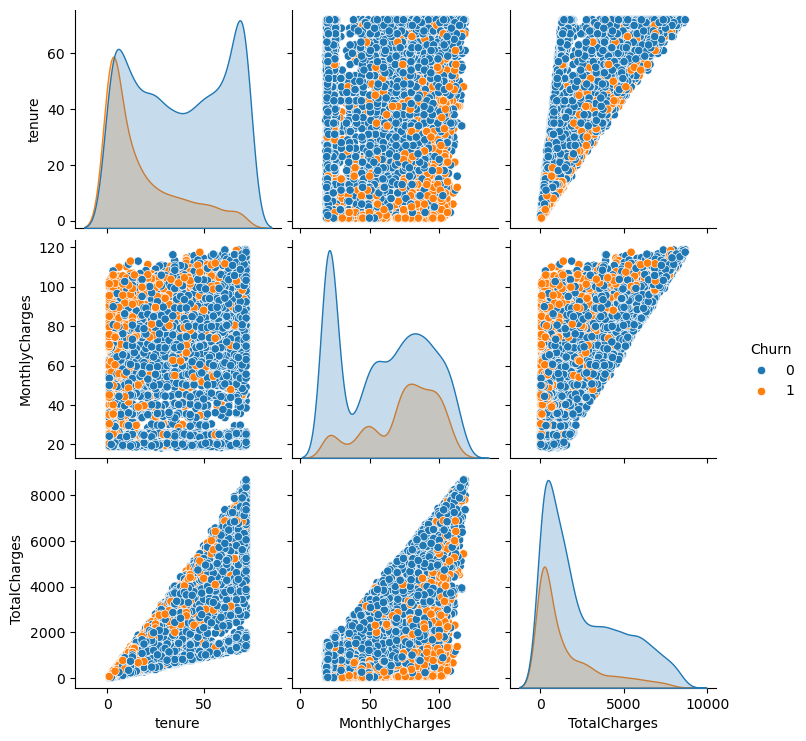

In [51]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_churn, hue='Churn')
plt.show()

## Binomial Logistic Regression

In [59]:
X = df_churn_processed_scaled.drop(columns=['Churn'])
y = df_churn_processed_scaled['Churn'].values

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [61]:
from sklearn.linear_model import LogisticRegression
model_log_reg = LogisticRegression()
result = model_log_reg.fit(X_train, y_train)

In [62]:
from sklearn import metrics
y_test_prediction = model_log_reg.predict(X_test)
print(metrics.accuracy_score(y_test,y_test_prediction))

0.795734597156398


## Evaluation

In [63]:
model_log_reg.predict(X_test)

array([0., 0., 1., ..., 0., 0., 0.], shape=(2110,))

In [64]:
model_log_reg.coef_

array([[-3.12456555,  0.05030618,  1.198418  , -0.02445382,  0.22107148,
         0.12000348, -0.2549979 , -0.2845691 ,  0.18903521,  0.20300174,
         0.8727392 , -0.11028707, -0.11028707, -0.3975147 , -0.11028707,
        -0.08369473, -0.11028707, -0.03168068, -0.11028707, -0.3614059 ,
        -0.11028707,  0.24172592, -0.11028707,  0.24477449, -0.81267595,
        -1.35859586,  0.20640025, -0.16613841,  0.21469409, -0.08403431]])

In [65]:
model_log_reg.intercept_

array([-0.25065976])

In [66]:
model_log_reg.feature_names_in_

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male',
       'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

Axes(0.125,0.11;0.775x0.77)


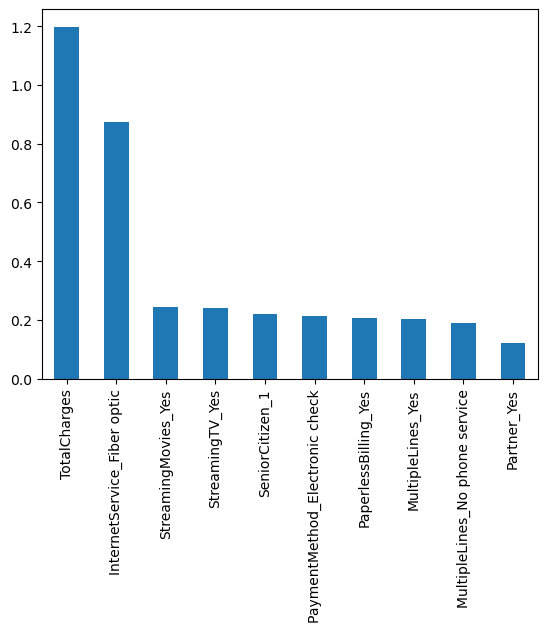

In [67]:
weights = pd.Series(model_log_reg.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


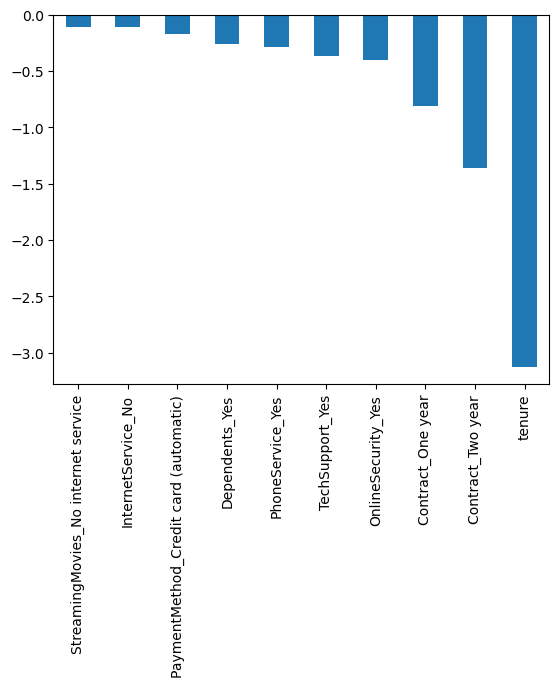

In [68]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 1100x1100 with 0 Axes>

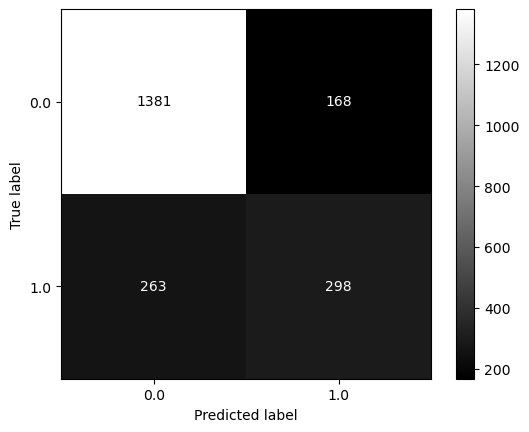

In [70]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_test_prediction, labels=model_log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model_log_reg.classes_)
disp.plot(cmap='gray')
plt.show()